In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd 

In [2]:
df_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2049,2195_01,Earth,False,F/440/P,TRAPPIST-1e,27.0,False,0.0,280.0,119.0,646.0,5.0,Naomie Coleyanglas,True
7844,8371_01,Earth,False,F/1605/S,55 Cancri e,52.0,False,0.0,0.0,638.0,115.0,0.0,Everly Lewinez,True
6901,7310_01,Mars,NaN,D/229/P,TRAPPIST-1e,28.0,False,1059.0,0.0,6.0,117.0,0.0,Toale Bette,False
6429,6787_03,Earth,False,F/1411/P,TRAPPIST-1e,17.0,False,108.0,4.0,1898.0,13.0,0.0,Therta Hurchanney,False
1204,1285_01,Earth,False,F/258/P,55 Cancri e,36.0,False,286.0,415.0,16.0,0.0,0.0,Ricia Weaverays,False


It looks like we have a Classification problem here 

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


We should understand what every feature of our dataset is referring to. 
Taking a closer look: 

<li>PassengerId: Comes in the form of gggg_pp, where $gggg$ refers to the group they are travelling with</li>
<li>HomePlanet: Where the Passenger originally originated from</li>
<li>CryoSleep: Whether the person opted into deep sleep or not, he/she does not age, and is confined to his/her cabin </li>
<li>Cabin: Where the cabin is located, in the form of deck / num / side. Side refers to P(Port) or S(Starboard)</li>
<li>Destination: Where the Passenger is travelling to</li> 
<li>Age: Age of the person travelling</li>
<li>VIP: whether the person has paid for special VIP service during the voyage</li>
<li>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: The amount of money the passenger has spent on each of these luxuries</li>
<li>Name: The first and last names</li>
<li>Transported: Our label data</li>

## Data Cleaning 

In [5]:
for row in df_train.columns:
    print("Percentage of {} missing is: {}".format(row, (df_train[row].isnull().sum()/len(df_train)) * 100))

Percentage of PassengerId missing is: 0.0
Percentage of HomePlanet missing is: 2.312205222592891
Percentage of CryoSleep missing is: 2.4962613597147127
Percentage of Cabin missing is: 2.289198205452663
Percentage of Destination missing is: 2.093638559760727
Percentage of Age missing is: 2.0591280340503855
Percentage of VIP missing is: 2.3352122397331185
Percentage of RoomService missing is: 2.082135051190613
Percentage of FoodCourt missing is: 2.105142068330841
Percentage of ShoppingMall missing is: 2.392729782583688
Percentage of Spa missing is: 2.105142068330841
Percentage of VRDeck missing is: 2.1626596111814105
Percentage of Name missing is: 2.300701714022777
Percentage of Transported missing is: 0.0


It looks like the missing percentages are quite low, we could fill in the missing data for numerical values with  
<li>Mean</li>
<li>Median</li>
And for categorical data with 
<li>Mode</li>


In [6]:
# lets see how much data is missing for the test dataset 

df_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [7]:
dataframes = [df_train, df_test]

In [8]:
# fill in the missing data here 

for data in dataframes:
    data["HomePlanet"].fillna(data["HomePlanet"].mode()[0], inplace = True)
    data["CryoSleep"].fillna(data["CryoSleep"].mode()[0], inplace = True)
    data["Cabin"].fillna(data["Cabin"].mode()[0], inplace = True)
    data["Destination"].fillna(data["Destination"].mode()[0], inplace = True)
    data["Age"].fillna(data["Age"].median(), inplace = True)
    data["VIP"].fillna(data["VIP"].mode()[0], inplace = True)
    data["RoomService"].fillna(data["RoomService"].mean(), inplace = True)
    data["FoodCourt"].fillna(data["FoodCourt"].mean(), inplace = True)
    data["ShoppingMall"].fillna(data["ShoppingMall"].mean(), inplace = True)
    data["Spa"].fillna(data["Spa"].mean(), inplace = True)
    data["VRDeck"].fillna(data["VRDeck"].mean(), inplace = True)
    data["Name"].fillna(data["Name"].mode()[0], inplace = True)
    

## Feature Engineering 

I could split the age into different bins,
<p>
PassengerId I could bin it into <b>Group</b>
</p>
<p>
The cabin I could have new groupings focused on <b>Deck and Port / Starboard</b>
</p>


In [9]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [10]:
# helper functions 
def getGroup(PassengerId):
    return PassengerId.split("_")[0]

def getDeck(Cabin):
    return Cabin.split("/")[0]

def getPosition(Cabin):
    return Cabin.split("/")[-1]
    

In [11]:
for data in dataframes:
    data["Age_Categories"] = pd.cut(data["Age"], bins = [0, 10, 20 ,60, np.inf], labels = ["Child", "Teenager", "Adults", "Elderly"])
    data["Passenger_Group"] = data["PassengerId"].apply(lambda x : getGroup(x))
    data["Deck"] = data["Cabin"].apply(lambda x : getDeck(x))
    data["Position"] = data["Cabin"].apply(lambda x : getPosition(x))
    data["CryoSleep"] = data["CryoSleep"].apply(lambda x : 0 if x == False else 1)
    data["VIP"] = data["VIP"].apply(lambda x : 0 if x == False else 1)

lets have a look to see if everything's okay

In [12]:
df_train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Categories,Passenger_Group,Deck,Position
604,0634_01,Earth,0,F/135/P,TRAPPIST-1e,39.0,0,0.0,1496.000000,0.000000,140.000000,383.000000,Patoya Wolfaddox,False,Adults,0634,F,P
3945,4211_01,Europa,1,C/134/P,TRAPPIST-1e,26.0,0,0.0,0.000000,0.000000,0.000000,0.000000,Sulabik Covale,True,Adults,4211,C,P
2087,2234_05,Mars,0,D/66/P,TRAPPIST-1e,31.0,0,21.0,0.000000,1031.000000,0.000000,304.854791,Burs Flité,False,Adults,2234,D,P
5003,5345_02,Mars,0,E/333/P,TRAPPIST-1e,27.0,0,134.0,0.000000,6.000000,1450.000000,0.000000,Cops Cheen,False,Adults,5345,E,P
7555,8076_02,Europa,0,C/263/P,55 Cancri e,29.0,0,2686.0,0.000000,0.000000,2854.000000,2553.000000,Achbah Emetillove,False,Adults,8076,C,P
1297,1379_01,Earth,0,F/268/S,TRAPPIST-1e,16.0,0,0.0,30.000000,0.000000,769.000000,4.000000,Lillen Mcgowaymond,False,Teenager,1379,F,S
1087,1154_01,Europa,1,B/43/P,TRAPPIST-1e,25.0,0,0.0,458.077203,0.000000,311.138778,0.000000,Celeb Ingascomet,True,Adults,1154,B,P
1103,1167_01,Mars,1,F/236/P,TRAPPIST-1e,28.0,0,0.0,0.000000,173.729169,0.000000,0.000000,Sugbix Terry,True,Adults,1167,F,P
8072,8631_01,Mars,1,E/553/P,TRAPPIST-1e,37.0,0,0.0,0.000000,0.000000,0.000000,0.000000,Denuts Stité,False,Adults,8631,E,P
7525,8049_01,Earth,0,G/1301/P,TRAPPIST-1e,22.0,0,6.0,21.000000,0.000000,782.000000,0.000000,Bonya Workmans,False,Adults,8049,G,P


## Exploratory Data Analysis

In [13]:
print("Passenger Groups")
print(len(df_train["Passenger_Group"].unique()))
print("=" * 20)
print("Destination")
print(len(df_train["Destination"].unique()))
print("=" * 20)
print("Deck")
print(len(df_train["Deck"].unique()))
print("=" * 20)



Passenger Groups
6217
Destination
3
Deck
8


Due to the large amount of Passenger groups , I'm not going to include it in the train data

In [14]:
df_train["Transported"] = df_train["Transported"].apply(lambda x : 0 if x == False else 1)

<Figure size 864x864 with 0 Axes>

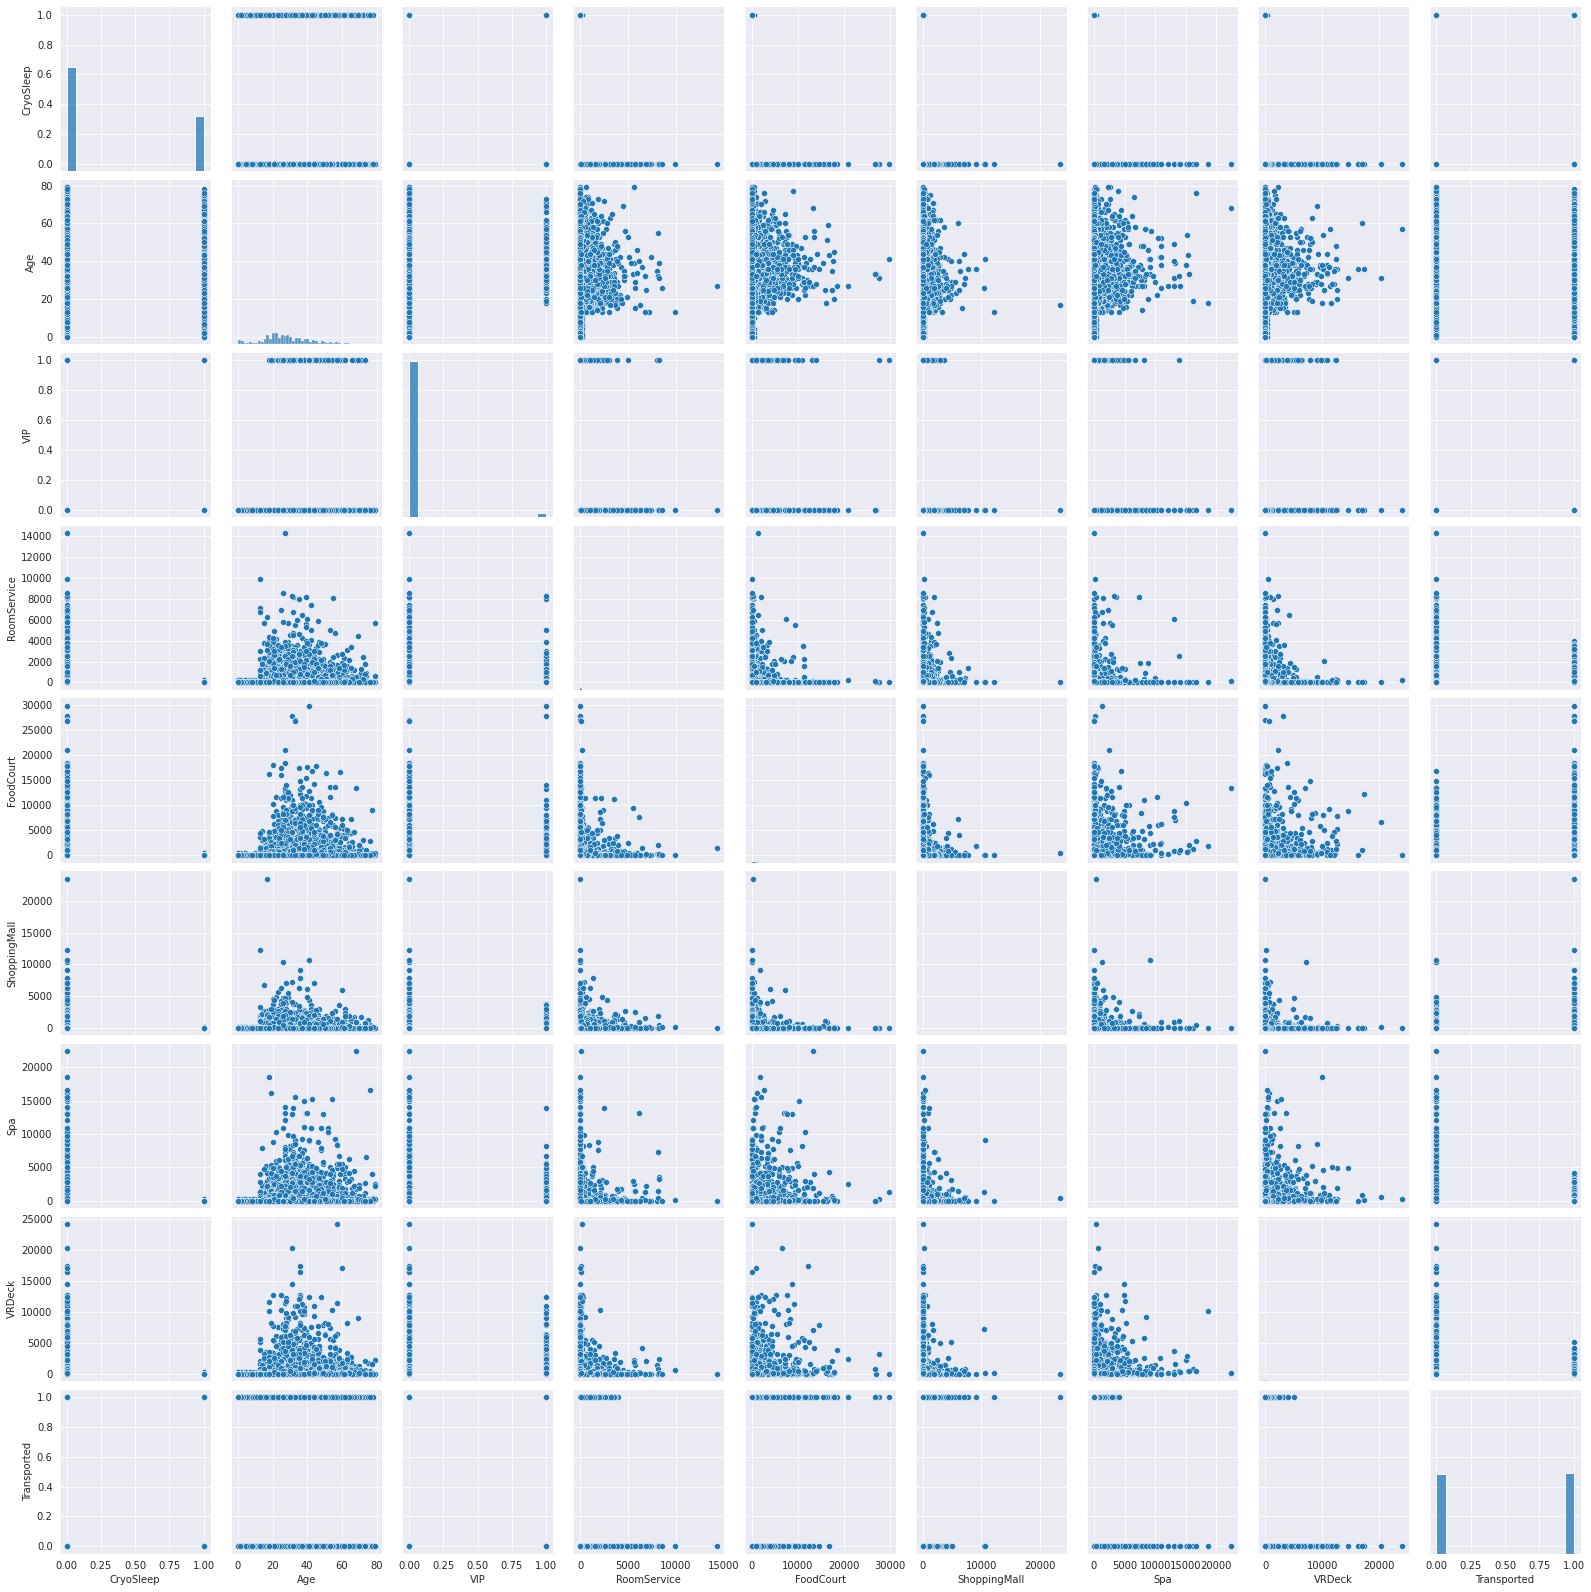

In [15]:
plt.figure(figsize = (12,12))
sns.pairplot(df_train)
plt.show()

## Age

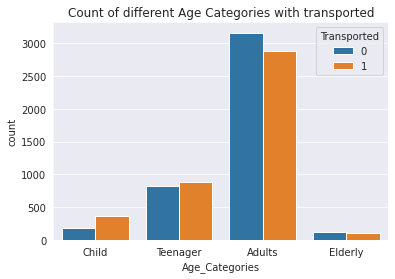

In [16]:
sns.countplot(x = "Age_Categories", hue = "Transported", data = df_train)
plt.title("Count of different Age Categories with transported")
plt.show()

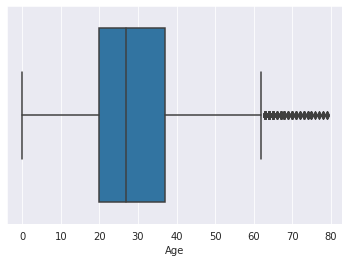

In [17]:
sns.boxplot(x = "Age", data = df_train)
plt.show()

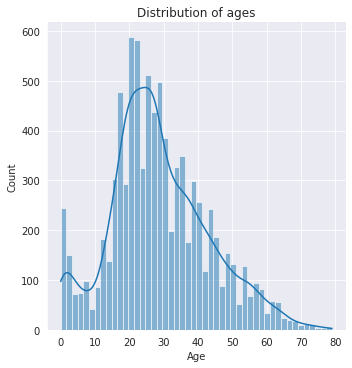

In [18]:
sns.displot(x = "Age", data = df_train, kde = True)
plt.title("Distribution of ages")
plt.show()

<p>There doesnt seem to be a significant difference in the % of transported in each category of age group, with the highest difference seen in adults</p>
<p>Looks like the majority of the passengers are people with ages in the range of 20 ~ 30</p>

## Home Planet

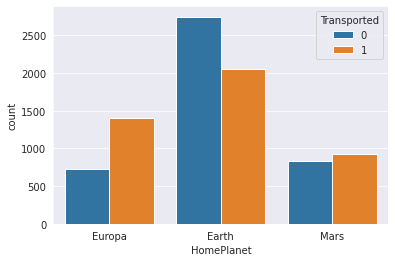

In [19]:
sns.countplot(x = "HomePlanet", hue = "Transported",data = df_train)
plt.show()

Looks like whichever the home planet the passenger is coming from has a huge impact on whether they get transported or not, very significant in Europa and Earth

## CryoSleep

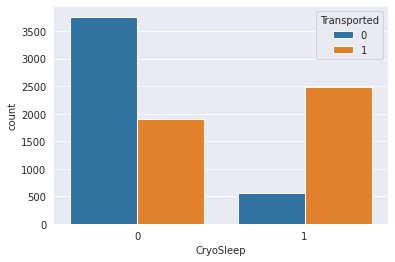

In [20]:
sns.countplot(x = "CryoSleep", hue = "Transported",data = df_train)
plt.show()

A huge % of people who were not in CryoSleep did <b>NOT</b> get transported, maybe they could react in the face of the disaster, whereas the people who were in CryoSleep could not react (I mean, they're literally sleeping right?)

## Destination

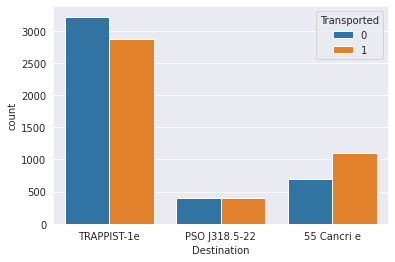

In [21]:
sns.countplot(x = "Destination", hue = "Transported",data = df_train)
plt.show()

People who are going to TRAPPIST-1e and 55 Cancri e have different distributions of transported wherease PSO is a 50/50

## VIP

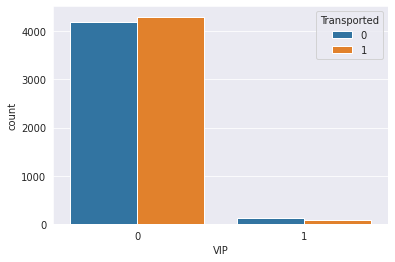

In [22]:
sns.countplot(x = "VIP", hue = "Transported",data = df_train)
plt.show()

Looks like this is a highly distorted feature, with very few data on those who were VIPs and significantly those who are not.

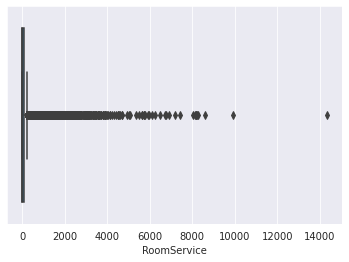

In [23]:
sns.boxplot(x = df_train["RoomService"])
plt.show()

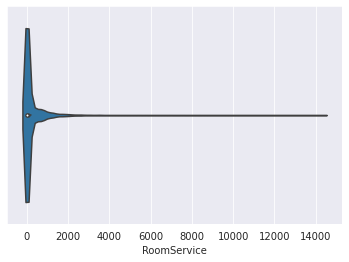

In [24]:
sns.violinplot(x = df_train["RoomService"])
plt.show()

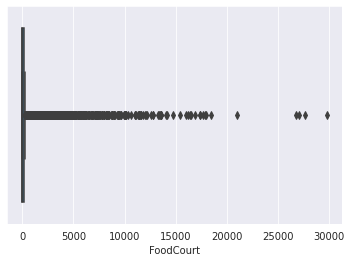

In [25]:
sns.boxplot(x = df_train["FoodCourt"])
plt.show()

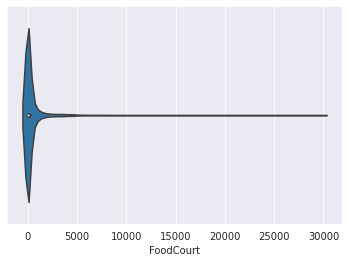

In [26]:
sns.violinplot(x = df_train["FoodCourt"])
plt.show()

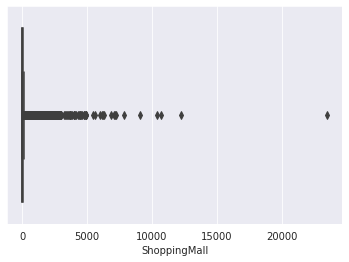

In [27]:
sns.boxplot(x = df_train["ShoppingMall"])
plt.show()

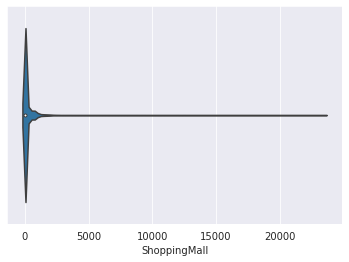

In [28]:
sns.violinplot(x = df_train["ShoppingMall"])
plt.show()

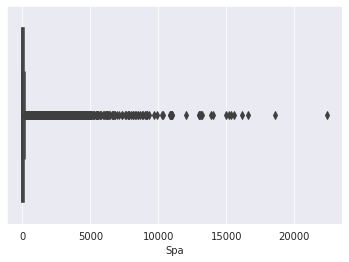

In [29]:
sns.boxplot(x = df_train["Spa"])
plt.show()

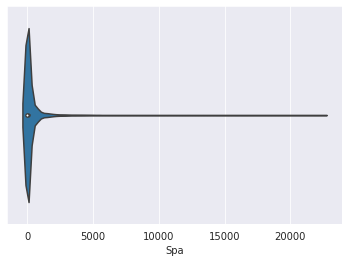

In [30]:
sns.violinplot(x = df_train["Spa"])
plt.show()

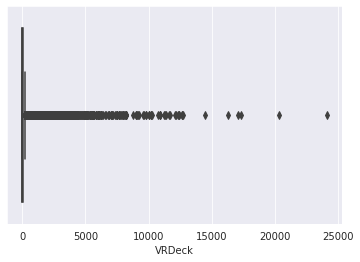

In [31]:
sns.boxplot(x = df_train["VRDeck"])
plt.show()

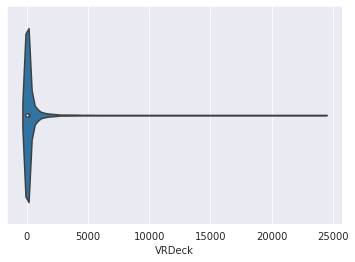

In [32]:
sns.violinplot(x = df_train["VRDeck"])
plt.show()

Looks like for these numerical data, There are ALOT of outliers!

In [33]:
# helper function 
def getValidRange(feature, data):
    q1, q3 = np.percentile(data[feature], [25, 75])
    iqr = q3 - q1 
    return [q1 - 1.5 *(iqr) , q3 + 1.5*(iqr)]

In [34]:
features_to_edit = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for feature in features_to_edit:
    lower_fence, upper_fence = getValidRange(feature, df_train)
    print(feature, len(data[feature].loc[(data[feature] > upper_fence) | (data[feature] < lower_fence)]))

print("total", len(df_train))

RoomService 909
FoodCourt 927
ShoppingMall 925
Spa 894
VRDeck 851
total 8693


Looks like a lot of the passengers have a count spent of 0 anyway. It really doesnt tell much about whether it helps with the probability of them being transported or not

## Deck 

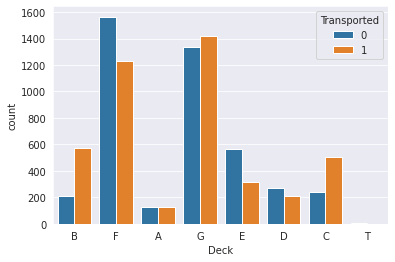

In [35]:
sns.countplot(x = "Deck", hue = "Transported",data = df_train)
plt.show()

## Position

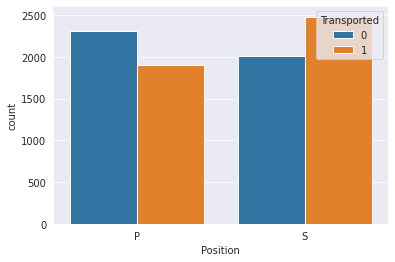

In [36]:
sns.countplot(x = "Position", hue = "Transported",data = df_train)
plt.show()

In [37]:
y = df_train["Transported"]
x = df_train[["HomePlanet", "CryoSleep", "Destination", "Age", "VIP", "Deck", "Position", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
num_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cat_features = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Deck", "Position"]

num_pipeline = Pipeline([
    ("Min_max", StandardScaler())
    
])
cat_pipeline = Pipeline([
    ("one_hot", OneHotEncoder())
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])





In [39]:
x = pipeline.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression

lin_reg = LogisticRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score

print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7872340425531915


In [43]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred) )

accuracy:  0.7291546866014951


In [44]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
y_pred = DTC.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred) )

accuracy:  0.7441058079355952


In [45]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred) )

accuracy:  0.7872340425531915


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
y_pred = LDA.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred) )

accuracy:  0.7590569292696953


In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train, y_train)
y_pred = QDA.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred) )

accuracy:  0.7211040828062104


In [48]:
from sklearn.ensemble import RandomForestClassifier

RDC = RandomForestClassifier()
RDC.fit(x_train, y_train)
y_pred = RDC.predict(x_test)
print("accuracy: ", accuracy_score(y_test, y_pred) )

accuracy:  0.79700977573318


In [49]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_knn)

78.84


In [50]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_gbk)

79.47


In [51]:
df_test.head()
test = df_test[["HomePlanet", "CryoSleep", "Destination", "Age", "VIP", "Deck", "Position", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]

In [52]:
test_data = pipeline.transform(test)

In [53]:
predict = RDC.predict(test_data)


In [54]:
sub = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

In [55]:
sub["Transported"] = predict
sub["Transported"] = sub["Transported"].apply(lambda x : False if x == 0 else True)

In [56]:
sub.to_csv("submission.csv", index = False)